In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [120]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [121]:
def getInfo(indata):
    """Print Dataframe information"""
    print(indata.head())
    print(indata.shape)
    print(indata.tail(3))

 seaborn.countplot(x=None, y=None, hue=None, data=None, 
                   order=None, hue_order=None, orient=None, 
                   color=None, palette=None, saturation=0.75, 
                   dodge=True, ax=None, **kwargs)
 

In [122]:
#data = pd.read_csv("C:\\data\\DataScience\\DataSets\\Autism-Screening\\Toddler Autism dataset.csv")
data = pd.read_csv("C:\\data\\DataScience\\Projects\\capstone\\proj1\\Toddler Autism dataset.csv")
#print(data.info())  #call function to print info if needed
data['JaundiceCode']= data.Jaundice.eq('yes').mul(1)
data['ASDCode']= data.ASD.eq('yes').mul(1)
data['SexCode']= data.ASD.eq('yes').mul(1)
getInfo(data)
#print(data.columns)

   Case_No  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0        1         0         0         0         0         0         0   
1        2         1         1         0         0         0         1   
2        3         1         0         0         0         0         0   
3        4         1         1         1         1         1         1   
4        5         1         1         0         1         1         1   

   A7_Score  A8_Score  A9_Score   ...     Qchat-10-Score  Sex       Ethnicity  \
0         1         1         0   ...                  3    f  middle eastern   
1         1         0         0   ...                  4    m  White European   
2         1         1         0   ...                  4    m  middle eastern   
3         1         1         1   ...                 10    m        Hispanic   
4         1         1         1   ...                  9    f  White European   

  Jaundice Family_mem_with_ASD Who completed the test  ASD JaundiceC

 seaborn.countplot(x=None, y=None, hue=None, data=None, 
                   order=None, hue_order=None, orient=None, 
                   color=None, palette=None, saturation=0.75, 
                   dodge=True, ax=None, **kwargs)
 
Index(['Case_No', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'ASD', 'JaundiceCode', 'ASDCode'],
      dtype='object')
   

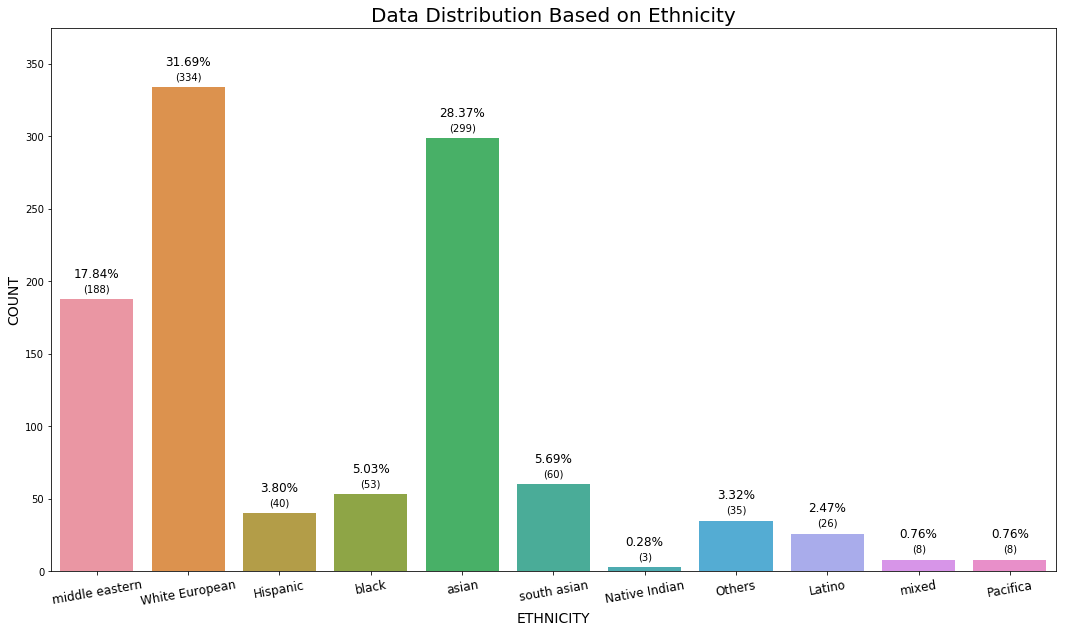

In [123]:
plt.figure(figsize = (18,10))
ax=sns.countplot(x = 'Ethnicity' , data = data,  orient="H")
total = float(len(data))
#print(total)
ax.set_title("Data Distribution Based on Ethnicity", fontsize=20)
plt.ylabel("COUNT", fontsize=14)
plt.xlabel("ETHNICITY", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="center", fontsize=12)
#plt.tight_layout()  #for making it more compact
plt.ylim(0, 375)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
    ax.text(p.get_x()+p.get_width()/2.,
    height + 5,
    '({:1.0f})'.format(height),
    ha="center", fontsize=10) 
plt.show()

Above figure shows the data distribution based on the Ethnicity of the todler. Majority of the sample is from Middle Eastern, White European and Asian ethnicity 



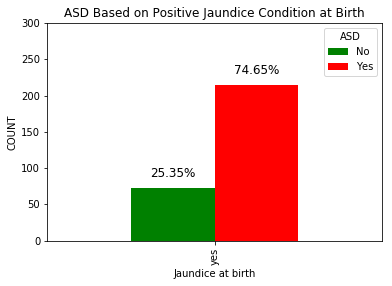

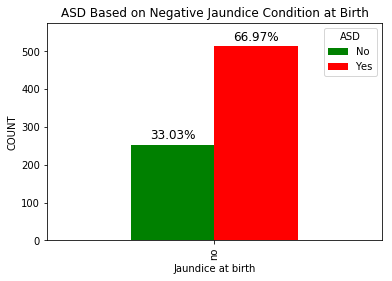

In [154]:
asd_yes=data.loc[data['Jaundice'] == 'yes']
asd_no=data.loc[data['Jaundice'] == 'no']
#print(asd_yes)
#print(asd_yes.info())
#plt.subplot(1, 2, 1)
ax=pd.crosstab(asd_yes.Jaundice, asd_yes.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Jaundice at birth", fontsize=10)
ax.set_title("ASD Based on Positive Jaundice Condition at Birth", fontsize=12)
total = float(len(asd_yes))
plt.ylim(0, 300)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
#plt.subplot(1, 2, 2)
ax=pd.crosstab(asd_no.Jaundice, asd_no.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Jaundice at birth", fontsize=10)
ax.set_title("ASD Based on Negative Jaundice Condition at Birth", fontsize=12)
total = float(len(asd_no))
plt.ylim(0, 575)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
plt.show()


Above plots shows the Jaundice condition influence on ASD and it does seems to contribute to ASD condition


170.0
884.0


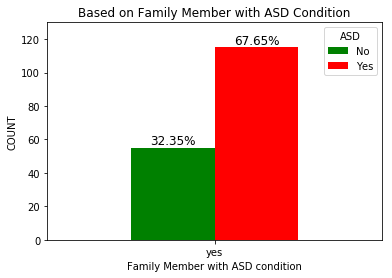

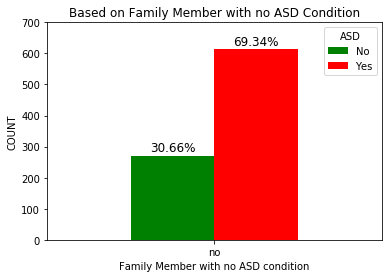

In [155]:
fm_asd_yes=data.loc[data['Family_mem_with_ASD'] == 'yes']
fm_asd_no=data.loc[data['Family_mem_with_ASD'] == 'no']
#print(asd_yes)
#print(asd_yes.info())
#plt.subplot(1, 2, 1)
ax=pd.crosstab(fm_asd_yes.Family_mem_with_ASD, fm_asd_yes.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Family Member with ASD condition", fontsize=10)
ax.set_title("Based on Family Member with ASD Condition", fontsize=12)
total = float(len(fm_asd_yes))
print(total)
plt.ylim(0, 130)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height +2,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)  
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
#plt.subplot(1, 2, 2)

ax=pd.crosstab(fm_asd_no.Family_mem_with_ASD, fm_asd_no.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Family Member with no ASD condition", fontsize=10)
ax.set_title("Based on Family Member with no ASD Condition", fontsize=12)
total = float(len(fm_asd_no))
print(total)
plt.ylim(0, 700)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above is the plot showing distribution of ASD condition based on if the ASD condition existed in any of the family member. The above plot doesn't show much if Family member with ASD condition contributes to ASD condition in todler.


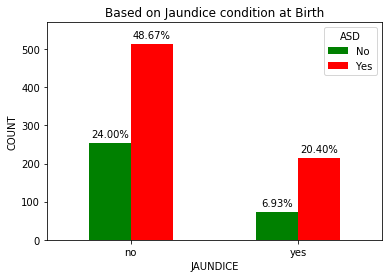

In [161]:
#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("JAUNDICE", fontsize=10)
ax.set_title("Based on Jaundice condition at Birth", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above plot shows the distribution of ASD cases based on Jaundice condition at birth.


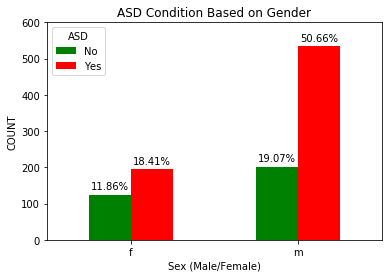

In [251]:
ax=pd.crosstab(data.Sex, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Sex (Male/Female)", fontsize=10)
ax.set_title("ASD Condition Based on Gender", fontsize=12)
total = float(len(data))
plt.ylim(0, 600)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above is the plot showing distribution of ASD cases based on Gender. Its quite evident that the condition is more prominent in males.


Deactivated this section as still in WIP

#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
#ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("JAUNDICE", fontsize=10)
total = float(len(data))
#yj_total = float(len(data.loc[data['Jaundice'] == 'yes']))
#nj_total = float(len(data.loc[data['Jaundice'] == 'no']))
#print(total)
#print(yj_total)
#print(nj_total)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

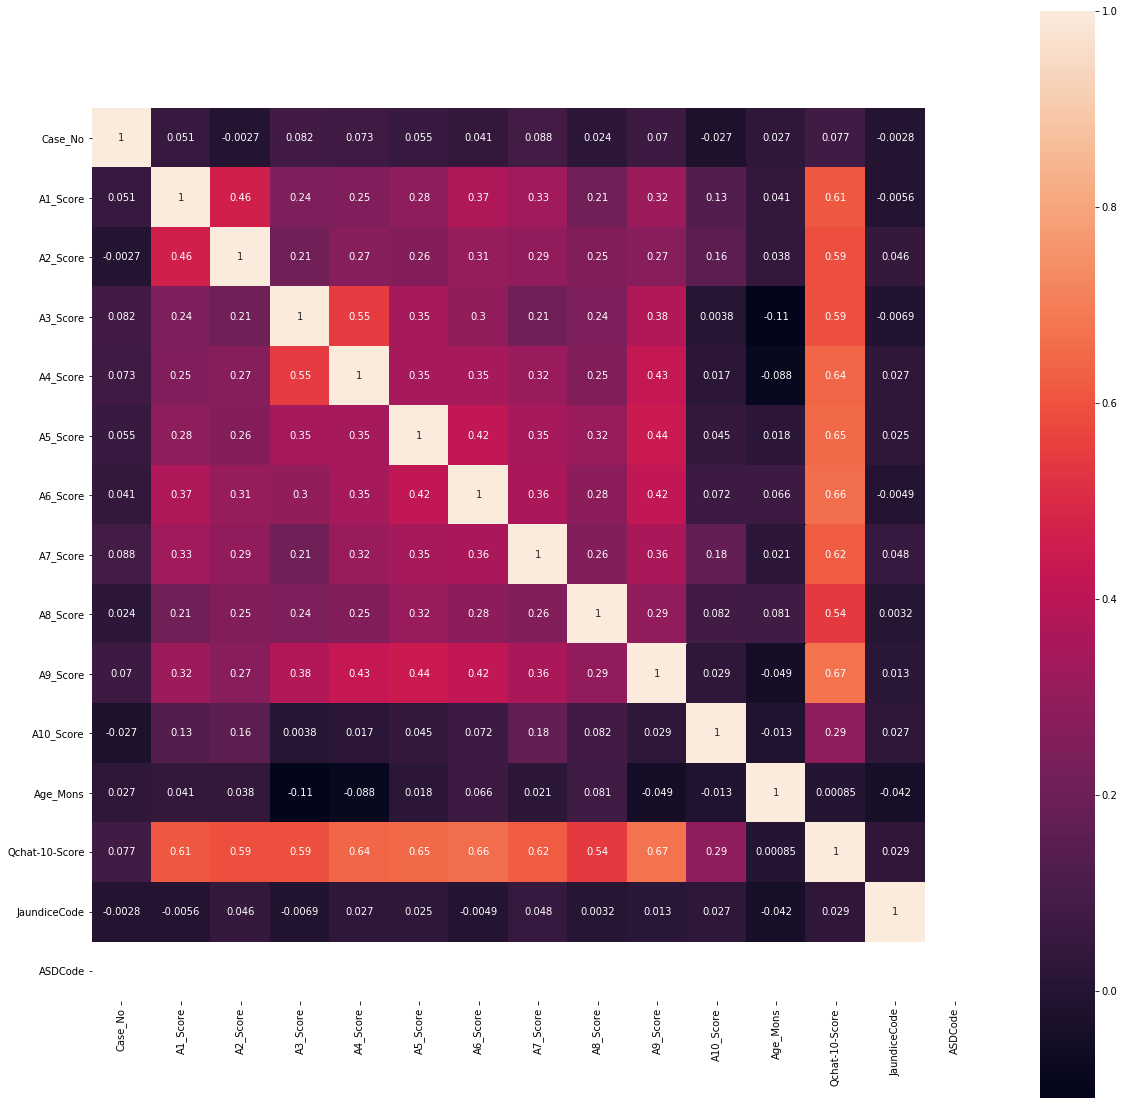

In [116]:
corr = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)
plt.show()